In [21]:
import yfinance as yf

In [22]:
# Define the ticker symbol and the date range
ticker = "INTC"
start_date = "2010-01-01"
end_date = "2024-09-19"

# Download the data
data = yf.download(ticker, start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,20.790001,21.030001,20.730000,20.879999,13.519425,47800900
2010-01-05,20.940001,20.990000,20.600000,20.870001,13.512952,52357700
2010-01-06,20.809999,20.930000,20.670000,20.799999,13.467626,40037400
2010-01-07,20.730000,20.760000,20.340000,20.600000,13.338134,54041500
2010-01-08,20.540001,20.889999,20.400000,20.830000,13.487050,48234700
...,...,...,...,...,...,...
2024-09-12,19.430000,19.540001,19.040001,19.360001,19.360001,51602900
2024-09-13,19.490000,19.799999,19.490000,19.660000,19.660000,44236300
2024-09-16,20.030001,21.070000,19.760000,20.910000,20.910000,149337000


<Axes: >

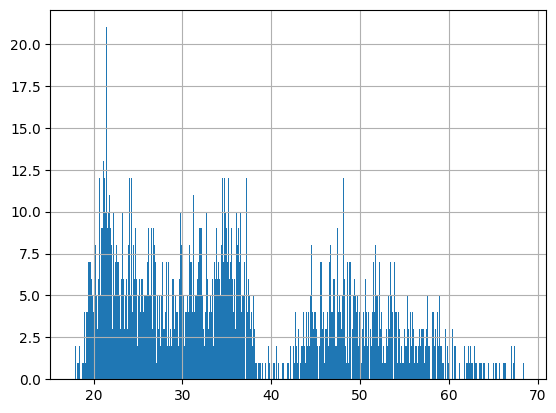

In [23]:
data["Close"].hist(bins=1000)

In [24]:
from sklearn.preprocessing import StandardScaler
import xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
X = data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]][:-1].values.reshape(-1, 6)
y = data[["Open", "High", "Low", "Close", "Adj Close", "Volume"]][1:].values

X.shape, y.shape

((3701, 6), (3701, 6))

In [26]:
X_train, X_test = X[: int(len(X) * 0.8)], X[int(len(X) * 0.8) :]
y_train, y_test = y[: int(len(y) * 0.8)], y[int(len(y) * 0.8) :]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2960, 6), (741, 6), (2960, 6), (741, 6))

In [27]:
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
y_pred = []
last_data = X_test[0].reshape(1, 6)

for i in range(y_test.shape[0]):
    last_data = model.predict(last_data)
    y_pred.append(last_data)

y_pred = np.array(y_pred).reshape(-1, 6)
y_pred.shape

(741, 6)

In [29]:
close_test = y_test[:, 3]
close_pred = y_pred[:, 3]

In [30]:
# Import RMSE and MAPE
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

# Calculate RMSE and MAPE
rmse = root_mean_squared_error(close_test, close_pred)
mape = mean_absolute_percentage_error(close_test, close_pred)

print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 18.9540790190182
MAPE: 0.5443814487308981
